# Stock market analysis and predictions using LSTM
Load libs

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

## Load data from Yahoo

In [2]:
yf.pdr_override()

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900,AMAZON
2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500,AMAZON
2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200,AMAZON
2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000,AMAZON
2024-07-02,197.279999,200.429993,195.929993,200.000000,200.000000,45600000,AMAZON
2024-07-03,199.940002,200.029999,196.759995,197.589996,197.589996,31597900,AMAZON
2024-07-05,198.649994,200.550003,198.169998,200.000000,200.000000,39858900,AMAZON
2024-07-08,200.039993,201.199997,197.960007,199.289993,199.289993,34767300,AMAZON
2024-07-09,199.399994,200.570007,199.050003,199.339996,199.339996,32700100,AMAZON


## Explore the data

In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,184.972460,186.598016,183.507897,185.100397,184.651576,6.045563e+07
std,12.492709,12.717969,12.386967,12.675284,12.751330,2.470625e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801842,4.710042e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502808,5.377700e+07
75%,191.652504,192.947495,190.725002,192.017502,191.358162,6.615335e+07
max,229.300003,233.080002,229.250000,232.979996,232.979996,2.464214e+08


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-11 to 2024-07-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


Closing price

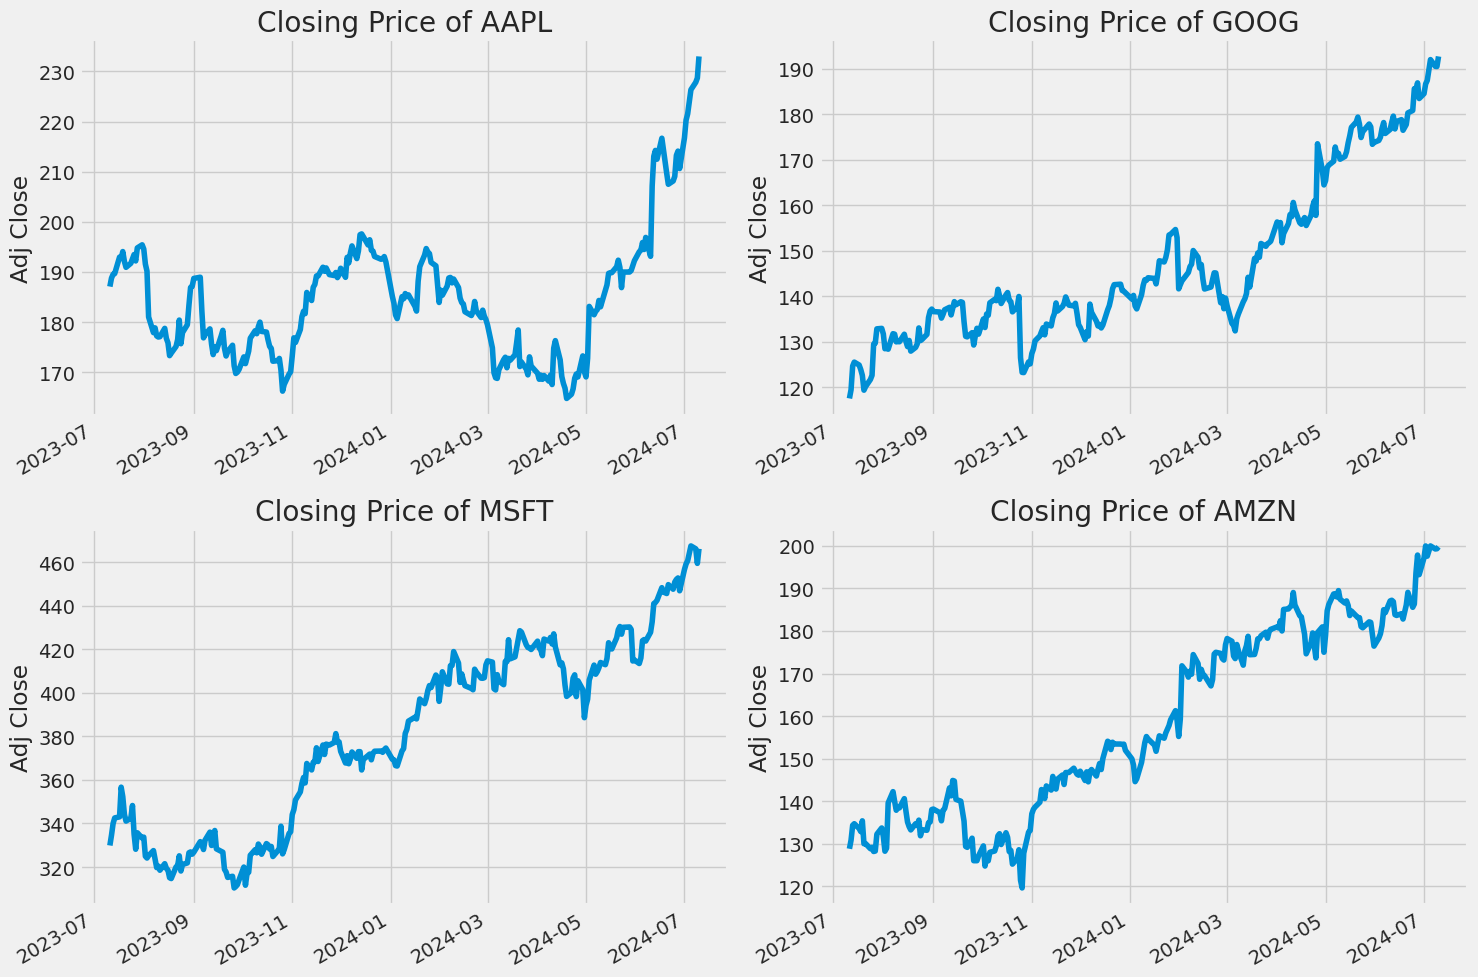

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Sales Volume

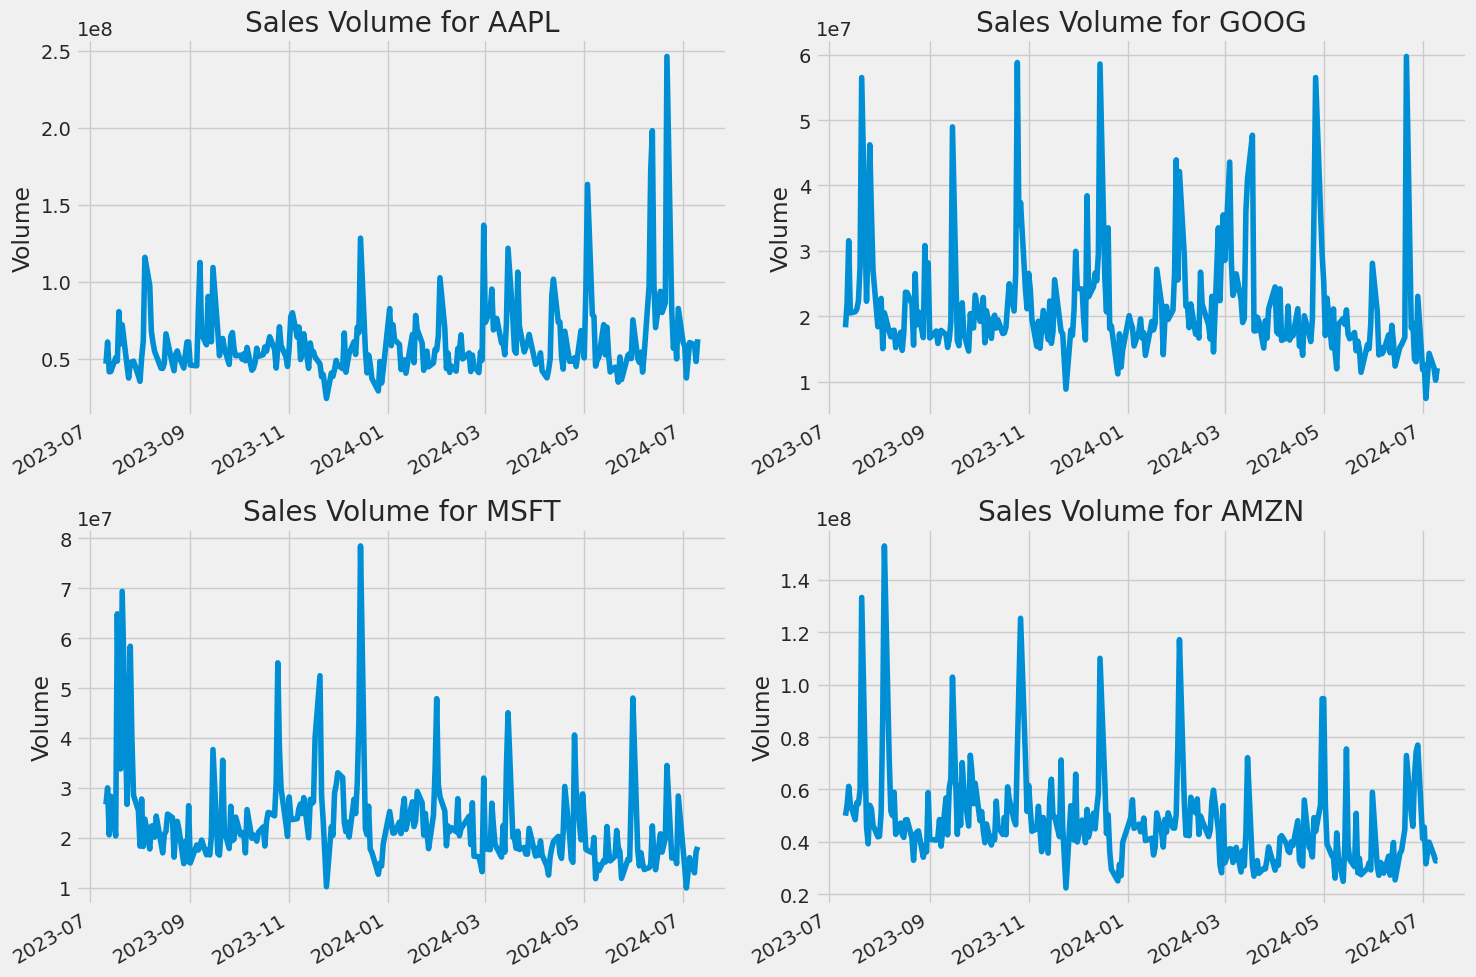

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## Moving Average (MACD)

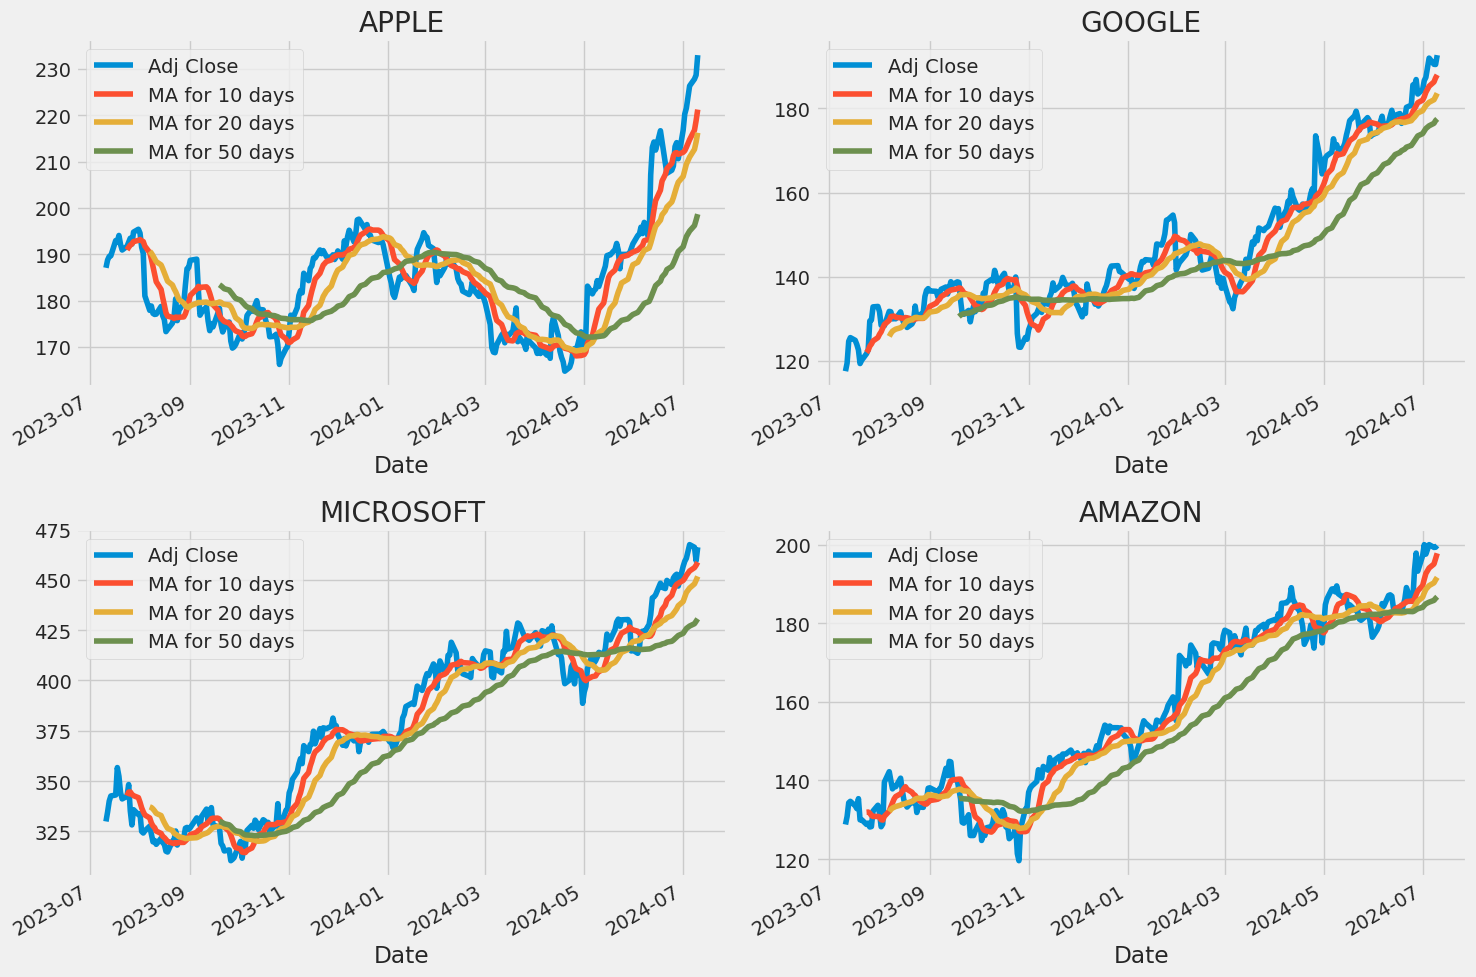

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily return on the stock

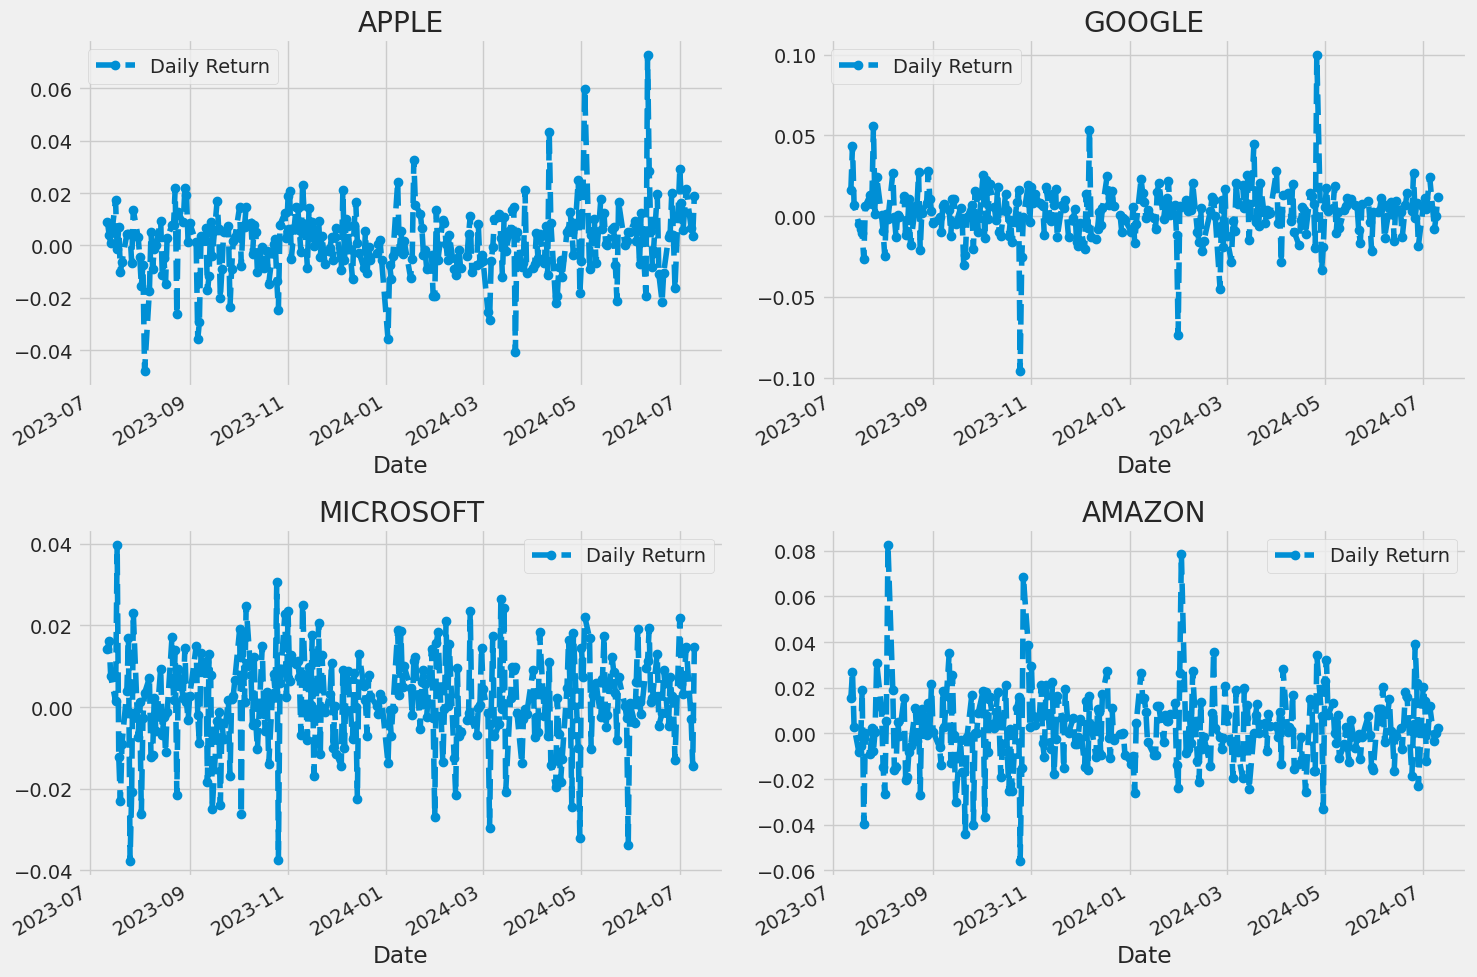

In [8]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Risk of investing in any given stock

[*********************100%%**********************]  4 of 4 completed


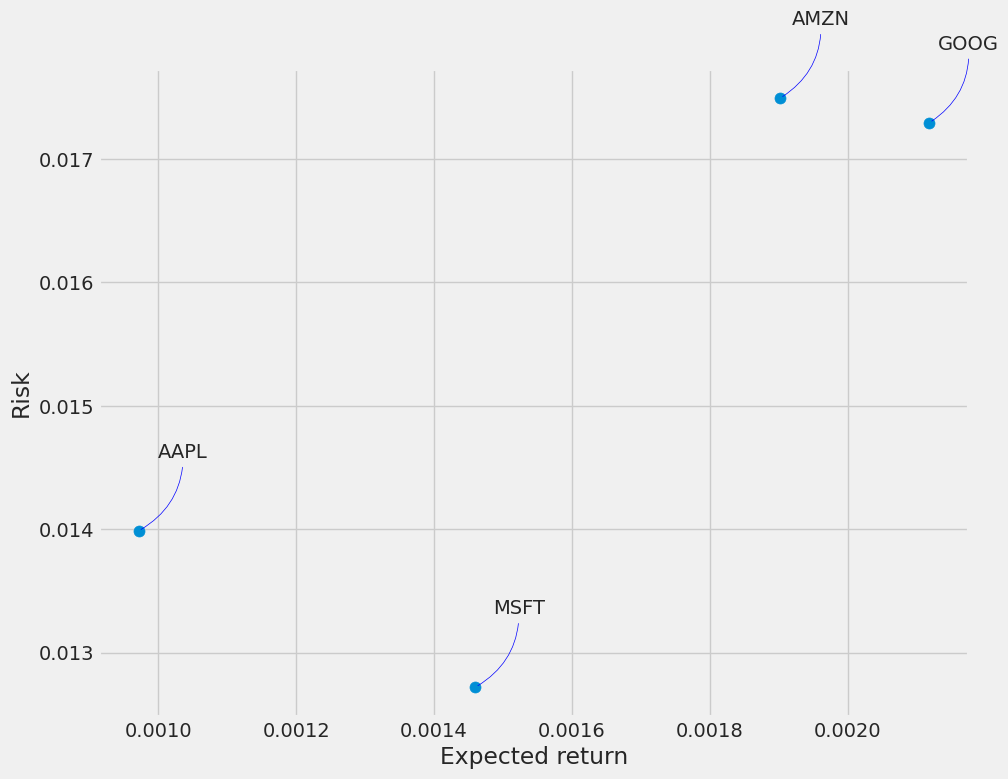

In [9]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting closing price of a stock

In [10]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416984,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483711,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754257,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734030,394024400
...,...,...,...,...,...,...
2024-07-03,220.000000,221.550003,219.029999,221.550003,221.550003,37369800
2024-07-05,221.649994,226.449997,221.649994,226.339996,226.339996,60412400
2024-07-08,227.089996,227.850006,223.250000,227.820007,227.820007,59085900


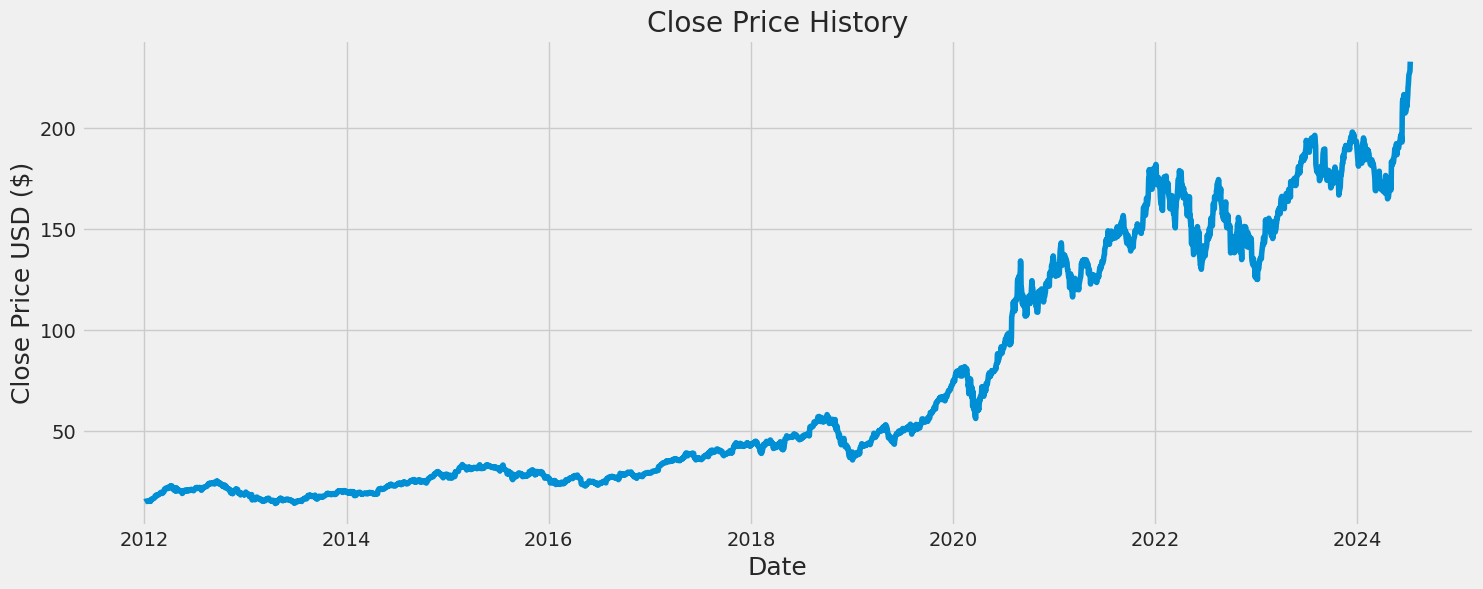

In [11]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [12]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2992

## Scale the data

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00337523],
       [0.00373558],
       [0.004484  ],
       ...,
       [0.9764419 ],
       [0.9803682 ],
       [1.        ]])

## Create training dataset

In [14]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00337523, 0.00373558, 0.004484  , 0.00519655, 0.00508731,
       0.00533352, 0.00522101, 0.00503187, 0.00477424, 0.00557158,
       0.00629065, 0.0060689 , 0.00485414, 0.00601346, 0.00487207,
       0.00915226, 0.00882126, 0.00925336, 0.01018766, 0.01075346,
       0.01070617, 0.0105317 , 0.01127523, 0.01197474, 0.01276719,
       0.01404717, 0.01673594, 0.0167767 , 0.01827355, 0.0193921 ,
       0.01746969, 0.01820995, 0.01819528, 0.02027097, 0.01997583,
       0.02052206, 0.02150365, 0.02204989, 0.02362337, 0.02476964,
       0.02510064, 0.02521642, 0.0232565 , 0.02278364, 0.02285375,
       0.02469627, 0.02521479, 0.02632845, 0.02895363, 0.03245605,
       0.03180056, 0.03180219, 0.03433444, 0.03512689, 0.03456271,
       0.03404746, 0.03351101, 0.03529319, 0.03651611, 0.0370281 ])]
[0.03576279304273537]

[array([0.00337523, 0.00373558, 0.004484  , 0.00519655, 0.00508731,
       0.00533352, 0.00522101, 0.00503187, 0.00477424, 0.00557158,
       0.00629065, 0.0060689 , 0.00

## Create the LSTM model

In [15]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
model = Sequential()
# model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences = True ))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

2.13.1


2024-07-11 13:30:01.897057: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [16]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/100
92/92 [==============================] - 15s 83ms/step - loss: 0.0046
Epoch 2/100
92/92 [==============================] - 7s 80ms/step - loss: 2.5899e-04
Epoch 3/100
92/92 [==============================] - 8s 84ms/step - loss: 2.4916e-04
Epoch 4/100
92/92 [==============================] - 7s 80ms/step - loss: 2.4594e-04
Epoch 5/100
92/92 [==============================] - 7s 78ms/step - loss: 2.3188e-04
Epoch 6/100
92/92 [==============================] - 9s 94ms/step - loss: 2.3131e-04
Epoch 7/100
92/92 [==============================] - 8s 84ms/step - loss: 2.2980e-04
Epoch 8/100
92/92 [==============================] - 7s 80ms/step - loss: 2.1155e-04
Epoch 9/100
92/92 [==============================] - 7s 79ms/step - loss: 2.4403e-04
Epoch 10/100
92/92 [==============================] - 8s 85ms/step - loss: 2.2552e-04
Epoch 11/100
92/92 [==============================] - 8s 82ms/step - loss: 2.2712e-04
Epoch 12/100
92/92 [==============================] - 8s 84ms/step

In [17]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 33ms/step


3.909970292643405

/tmp/ipykernel_90132/1682469802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


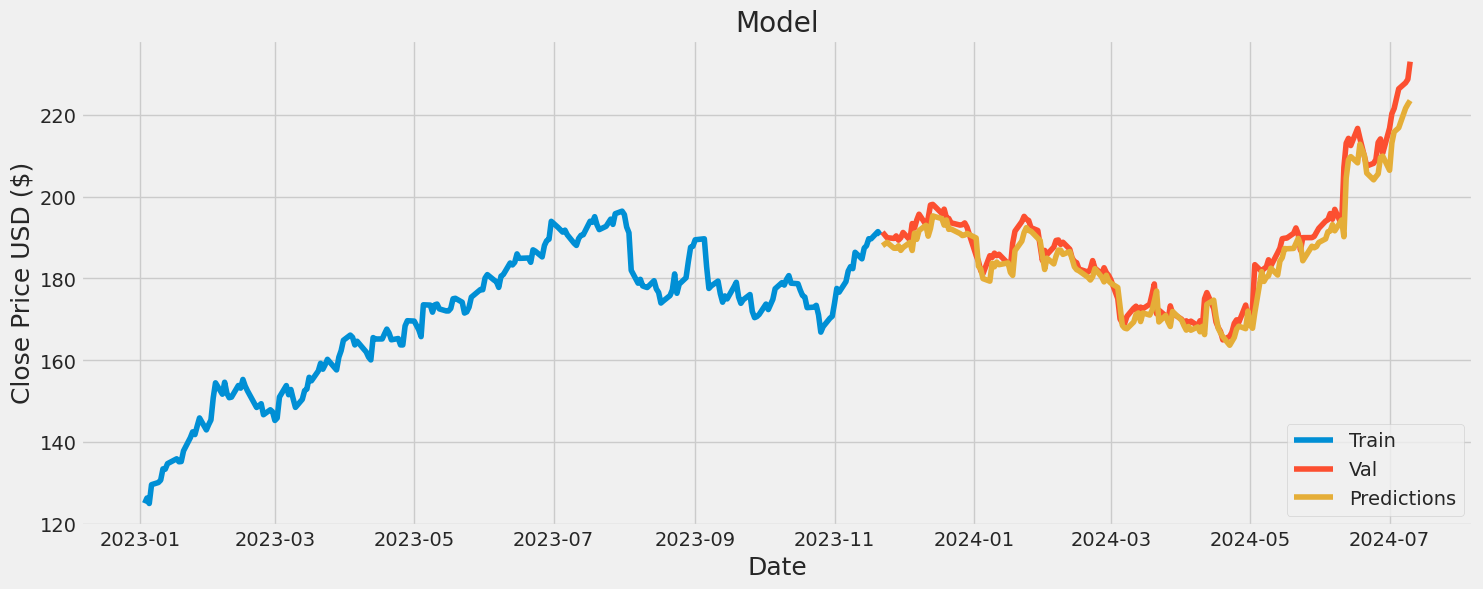

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Filter the data from 2023 onwards
train = train[train.index >= '2023-01-01']
valid = valid[valid.index >= '2023-01-01']

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
valid

,Close,Predictions
Date,,
2023-11-22,191.309998,188.020798
2023-11-24,189.970001,188.819519
2023-11-27,189.789993,187.408127
2023-11-28,190.399994,187.376938
2023-11-29,189.369995,187.993164
...,...,...
2024-07-03,221.550003,215.826263
2024-07-05,226.339996,216.827591
2024-07-08,227.820007,221.582550


# Model predictions 30 days into the future

5/5 [==============================] - 0s 36ms/step
RMSE: 3.909970292643405
1/1 [==============================] - 0s 33ms/step


/tmp/ipykernel_90132/3767313936.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


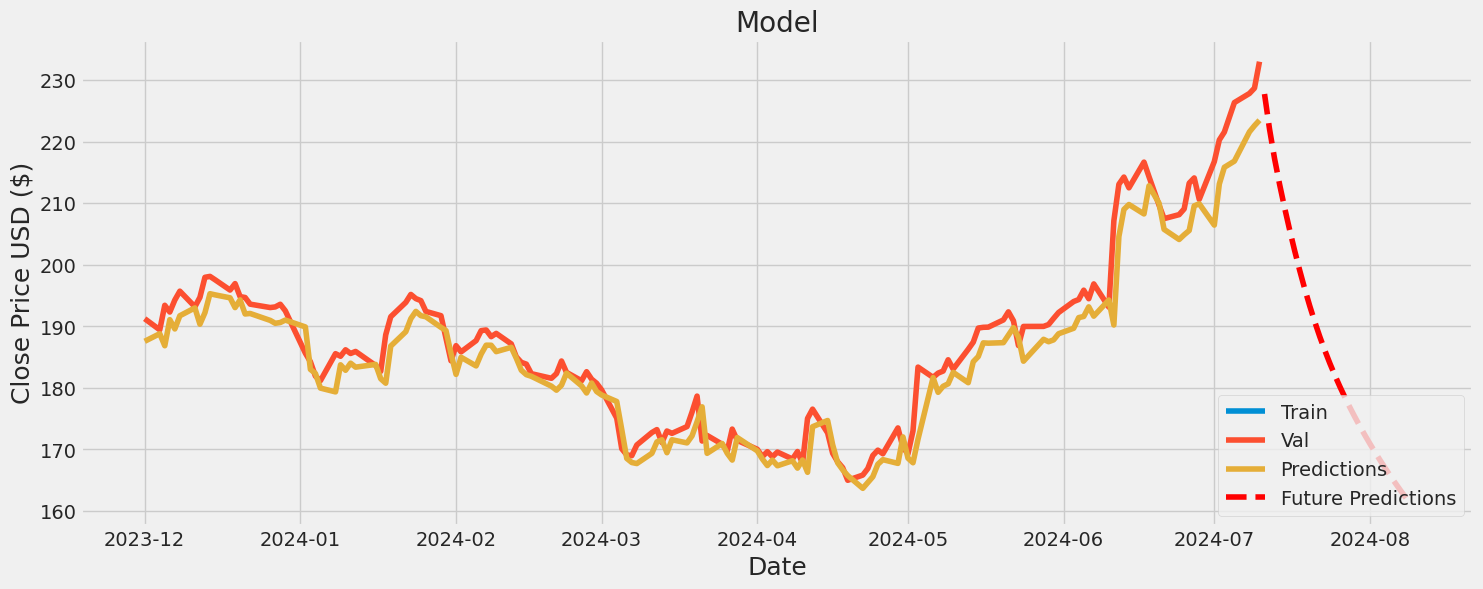

In [26]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'RMSE: {rmse}')

# Predicting the next 30 days
last_60_days = scaled_data[-60:]
next_30_days = []

for _ in range(30):
    last_60_days_input = last_60_days.reshape((1, last_60_days.shape[0], 1))
    pred_price = model.predict(last_60_days_input)
    next_30_days.append(pred_price[0, 0])
    last_60_days = np.append(last_60_days, pred_price)[1:]
    last_60_days = last_60_days.reshape(-1, 1)

next_30_days = scaler.inverse_transform(np.array(next_30_days).reshape(-1, 1))

# Generate dates for the next 30 days
future_dates = pd.date_range(start=df.index[-1], periods=31, closed='right')

# Plot the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Filter the data from 2023 onwards
train = train[train.index >= '2023-12-01']
valid = valid[valid.index >= '2023-12-01']

# Create a dataframe for future predictions
future_df = pd.DataFrame(index=future_dates, columns=['Predictions'])
future_df['Predictions'] = next_30_days.flatten()

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.plot(future_df['Predictions'], linestyle='dashed', color='r')
plt.legend(['Train', 'Val', 'Predictions', 'Future Predictions'], loc='lower right')
plt.show()
